<a href="https://colab.research.google.com/github/inderb312/projects/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis


imoprting required libraries

In [67]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import nltk
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


Importing data

In [68]:
df= pd.read_csv('https://github.com/inderb312/datasets/raw/main/Twitter_Reviews.csv')

undertsnding data with the help of various python functions

In [69]:
df.head()

,Review_Id,User_Name,User_Image,Comment,Thumbs_Up_Count,Version,Review_Created_At,Sort_Order
0,d80a474e-421c-408e-aa49-b06185a3830a,Sean Rollins,https://play-lh.googleusercontent.com/a-/ACNPE...,Twitter's obsession with turning itself into t...,7121,9.65.0-release.0,28-10-2022 01:48,most_relevant
1,adce2dfc-11d4-43e0-b4b3-891d942a3457,Andrew Pike,https://play-lh.googleusercontent.com/a-/ACNPE...,Absolute rubbish. It still keeps refreshing af...,4833,9.56.2-release.0,26-08-2022 08:26,most_relevant
2,205b4fe2-50f6-4cbd-b63a-d6a3722dfa24,Dean Hampton,https://play-lh.googleusercontent.com/a/ALm5wu...,The most recent update has ruined this app. Th...,2409,9.56.2-release.0,26-08-2022 18:31,most_relevant
3,2b18dec4-3094-4539-8f6e-dc51fe62fb21,Dave,https://play-lh.googleusercontent.com/a/ALm5wu...,No closed caption (cc) button is present to di...,4033,9.56.2-release.0,26-08-2022 16:05,most_relevant
4,426d8c6f-df41-459d-936c-eea1154af0b8,Royce Miller,https://play-lh.googleusercontent.com/a-/ACNPE...,This app is frustrating as heck. When you're s...,1671,9.57.0-release.1,02-09-2022 07:37,most_relevant


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_Id          1200 non-null   object
 1   User_Name          1200 non-null   object
 2   User_Image         1200 non-null   object
 3   Comment            1200 non-null   object
 4   Thumbs_Up_Count    1200 non-null   int64 
 5   Version            1049 non-null   object
 6   Review_Created_At  1200 non-null   object
 7   Sort_Order         1200 non-null   object
dtypes: int64(1), object(7)
memory usage: 75.1+ KB


In [71]:
df.describe()

,Thumbs_Up_Count
count,1200.000000
mean,166.042500
std,751.679729
min,0.000000
25%,0.000000
50%,1.000000
75%,16.000000
max,11155.000000


In [72]:
df.columns

Index(['Review_Id', 'User_Name', 'User_Image', 'Comment', 'Thumbs_Up_Count',
       'Version', 'Review_Created_At', 'Sort_Order'],
      dtype='object')

In [73]:
df_text= df.drop(['Review_Id', 'User_Name', 'User_Image','Thumbs_Up_Count','Version', 'Review_Created_At', 'Sort_Order'],axis=1)

In [74]:
df_text.head()

,Comment
0,Twitter's obsession with turning itself into t...
1,Absolute rubbish. It still keeps refreshing af...
2,The most recent update has ruined this app. Th...
3,No closed caption (cc) button is present to di...
4,This app is frustrating as heck. When you're s...


In [75]:
df_text.columns

Index(['Comment'], dtype='object')

In [76]:
df_text = pd.DataFrame(df_text)
df_text.rename(columns={'Comment':'text'}, inplace= True)

Data preprocessing

In [77]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [78]:
print(df_text['text'].iloc[0],"\n")
print(df_text['text'].iloc[1],"\n")
print(df_text['text'].iloc[2],"\n")
print(df_text['text'].iloc[3],"\n")
print(df_text['text'].iloc[4],"\n")

Twitter's obsession with turning itself into tiktok is ridiculous. It's now pointless to click into any video filmed in portrait mode, as the bottom ¼-⅓ of the video is cut off by the text. If you really want people to scroll from clip to clip à la tiktok, at least provide a way to make the text disappear, so the full format of each video can be enjoyed. And it might be nice to be able to scroll through videos of only people you have chosen to follow, instead of an algorithm going off topic. 

Absolute rubbish. It still keeps refreshing after updated. This is the only app that does this. Additionally I have to turn off automatic rotate as this also refreshes the screen. Update, now you have captions I want to be able to permanently switch it off. I didn't want it and did not ask for it, hate captions. Pity you did not properly fix the bugs mentioned above. Please do not add something without the ability to permanently turn it off. I am more and more dispising this app. 

The most recen

In [79]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1200 non-null   object
dtypes: object(1)
memory usage: 9.5+ KB


In [80]:
#from nltk import punkt
#from nltk import tokenizers/punkt/PY3/english.pickle

In [81]:
#df_text= df_text['text'].apply(data_processing)

In [82]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [89]:
pip install nltk

In [90]:
import nltk

In [91]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [92]:
df_text.text = df_text['text'].apply(data_processing)

In [94]:
df_text = df_text.drop_duplicates('text')

In [95]:

stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [96]:
df_text['text'] = df_text['text'].apply(lambda x: stemming(x))

In [98]:
df_text.head()

,text
0,twitters obsession turning tiktok ridiculous p...
1,absolute rubbish still keeps refreshing update...
2,recent update ruined app autogenerated caption...
3,closed caption cc button present disable featu...
4,app frustrating heck youre scrolling timeline ...


In [99]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [100]:
df_text['polarity'] = df_text['text'].apply(polarity)

In [101]:
df_text.head()

,text,polarity
0,twitters obsession turning tiktok ridiculous p...,0.158333
1,absolute rubbish still keeps refreshing update...,0.050000
2,recent update ruined app autogenerated caption...,-0.145089
3,closed caption cc button present disable featu...,-0.023864
4,app frustrating heck youre scrolling timeline ...,-0.155208


In [102]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [103]:
df_text['sentiment'] = df_text['polarity'].apply(sentiment)

In [105]:
df_text.head(10)

,text,polarity,sentiment
0,twitters obsession turning tiktok ridiculous p...,0.158333,Positive
1,absolute rubbish still keeps refreshing update...,0.050000,Positive
2,recent update ruined app autogenerated caption...,-0.145089,Negative
3,closed caption cc button present disable featu...,-0.023864,Negative
4,app frustrating heck youre scrolling timeline ...,-0.155208,Negative
5,recent update completely mean completely broke...,0.078241,Positive
6,stop adding features buggy nightmare instead f...,0.060000,Positive
7,closed captioning videos one thing ability tur...,-0.180000,Negative
8,latest update made app miserable closed captio...,-0.078571,Negative
9,today app completely nonfunctional device pixe...,0.164062,Positive


visualization

<Axes: xlabel='sentiment', ylabel='count'>

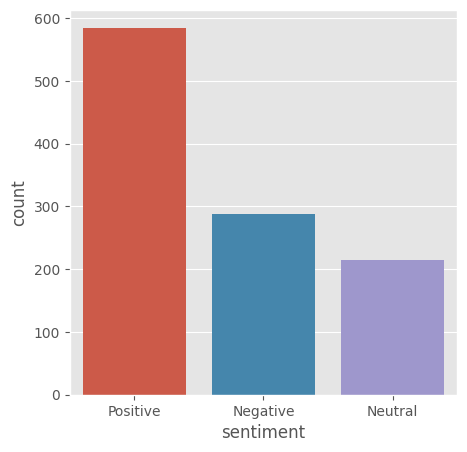

In [106]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df_text)

Text(0.5, 1.0, 'Distribution of sentiments')

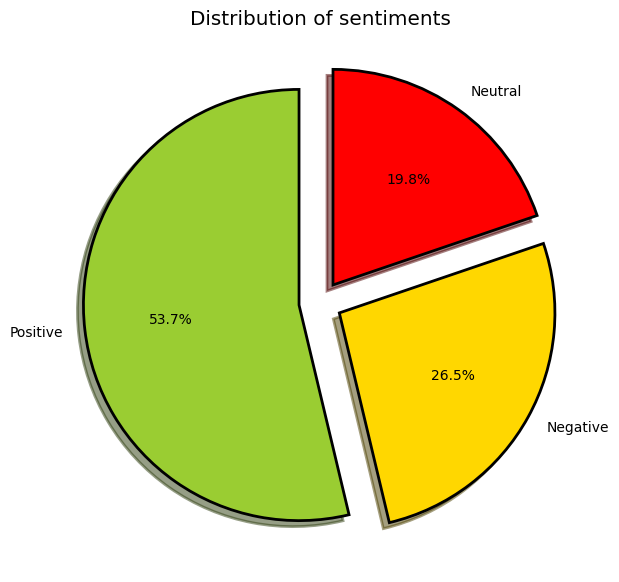

In [107]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df_text['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')